In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# w = 2, b = -1 
def my_sigmoid(x): 
  f = 1/(1+np.exp(-(2*x-1)))
  return f 

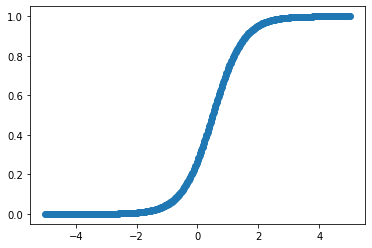

In [3]:
m = 500 

x = np.linspace(-5, 5, num = m) 
x = x.reshape(1, m) 

y = my_sigmoid(x) 
y = y.reshape(1, m) 

plt.scatter(x, y)

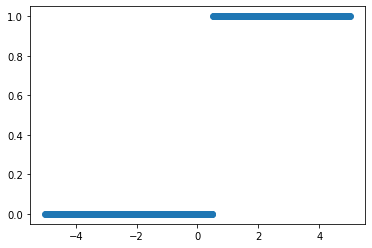

In [4]:
# creating labels: 

# TO DO: create labels based on the y values. 
# If a y value is greater than 0.5, label it as 1 
# If it is lesser than 0.5 label it as 0.
# Do this for each of the y values

y = y > 0.5 

plt.scatter(x, y)


In [5]:
# model 

x.shape, y.shape

((1, 500), (1, 500))

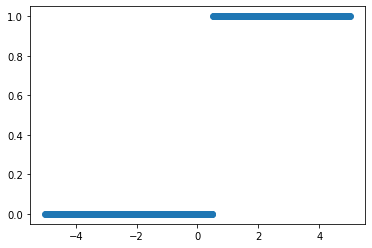

In [6]:
plt.scatter(x, y)

Hypothesis  
$$ \frac{1}{1+e^{-(W^TX+b)}} $$

In [7]:
# Hypothesis 

def y_hat(w, b, x): 

  f = 1/(1+ np.exp(-w*x + b)) 

  return f 
  

In [8]:
# weights 
w = 0 
b = 0 

Binary Cross Entropy (Log Loss)
$$ -\frac{1}{m}\sum_{i=1}^{m}y_ilog(\hat{y_i})+(1-y_i)log(1-\hat{y_i}) $$

In [9]:
# loss function 

def log_loss(y, y_pred):

    l = (-1/m)*np.sum(np.log(np.abs(y_pred-1+y))) 
    
    return l 


In [10]:
y_pred = y_hat(w, b, x)

In [11]:
log_loss(y, y_pred)

0.6931471805599454

In [14]:
# gradients wrt w, b 
def get_grads(w, b, x, y_pred, y):
  m  = y_pred.shape[1] 
  
  dz = y_pred -y 
  
  grads = {}

  grads['db'] = (1/m)*np.sum(dz) 
  grads['dw'] = (1/m)*np.dot(x, dz.T)[0][0] 

  return grads 


 Accuracy =  55.00000000000001 %


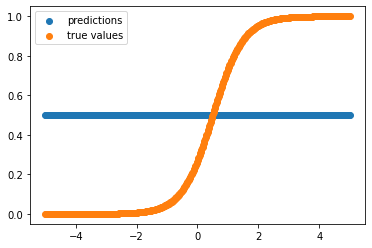

In [15]:
# model with no training 
plt.scatter(x, y_pred, label = "predictions")       # predictions
plt.scatter(x, my_sigmoid(x), label = "true values")   # true values 
plt.legend()

print(" Accuracy = ", np.sum((y_pred>0.5) == y)/m*100, "%")

# The blue line represents our current predictions

In [16]:
# training routine 

def runGradientDescent(x, y, params, max_iter, learning_rate = 0.05):
  # x: array of size (1, m) 
  # y: array of size (1, m) 
  # max_iter : Int 
  # learning_rate: Float 
  # params = Dictionary, 
  # params['w'] = w
  # params['b'] = b

  w = params['w']
  b = params['b']

  for i in range(max_iter): 

    y_pred = y_hat(w, b, x)

    grads = get_grads(w, b, x, y_pred, y) 

    dw = grads['dw']
    db = grads['db']

    # gradient descent 
    b = b - learning_rate*db 
    w = w - learning_rate*dw 

    loss = log_loss(y_pred, y) 
    losses.append(loss) 

  
  return w, b



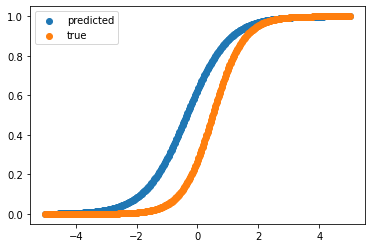

In [23]:
# losses list 
losses = [] 

# initialize params 
params = {'w':0, 'b': 0} 

w, b = runGradientDescent(x, y, params, max_iter = 50, learning_rate = 0.15)

y_pred = y_hat(w, b, x) 

plt.scatter(x, y_pred, label = "predicted")
plt.scatter(x, my_sigmoid(x), label = "true") 
plt.legend()

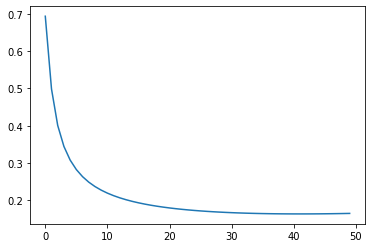

In [24]:
plt.plot(losses)

In [28]:
# accuracy 

np.sum((y_pred > 0.5) == y)/m*100

91.4